In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
dfa = pd.read_csv("All_MototA_type.csv")
dfb = pd.read_csv("All_MototB_type.csv")

In [3]:
dfa = dfa.apply(pd.to_numeric, errors='coerce')
dfb = dfb.apply(pd.to_numeric, errors='coerce')

dfa = dfa.astype(np.float32)
dfb = dfb.astype(np.float32)

print(dfa.dtypes, dfb.dtypes)

time            float32
encoderCount    float32
Velocity        float32
rawCurrent      float32
Current         float32
rawVoltageA1    float32
rawVoltageB1    float32
VoltageA1       float32
VoltageB1       float32
MotorVoltage    float32
MotorStatus     float32
PWM             float32
dtype: object time            float32
encoderCount    float32
Velocity        float32
rawCurrent      float32
Current         float32
rawVoltageA1    float32
rawVoltageB1    float32
VoltageA1       float32
VoltageB1       float32
MotorVoltage    float32
MotorStatus     float32
PWM             float32
dtype: object


In [4]:
dfa = dfa.fillna(dfa.mean())
dfb = dfb.fillna(dfb.mean())

In [5]:
print(f"{dfa.isna().sum()}\n\n{dfb.isnull().sum()}")

time            0
encoderCount    0
Velocity        0
rawCurrent      0
Current         0
rawVoltageA1    0
rawVoltageB1    0
VoltageA1       0
VoltageB1       0
MotorVoltage    0
MotorStatus     0
PWM             0
dtype: int64

time            0
encoderCount    0
Velocity        0
rawCurrent      0
Current         0
rawVoltageA1    0
rawVoltageB1    0
VoltageA1       0
VoltageB1       0
MotorVoltage    0
MotorStatus     0
PWM             0
dtype: int64


In [6]:
dfa

,time,encoderCount,Velocity,rawCurrent,Current,rawVoltageA1,rawVoltageB1,VoltageA1,VoltageB1,MotorVoltage,MotorStatus,PWM
0,22620.0,0.0,0.0,510.0,-0.01,0.0,0.0,0.00,0.00,0.000000,0.000000,126.000000
1,31472.0,0.0,0.0,511.0,-0.03,0.0,0.0,0.00,0.00,0.000000,0.000000,171.000000
2,41480.0,0.0,0.0,511.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,221.000000
3,51480.0,0.0,0.0,511.0,0.03,0.0,0.0,0.00,0.00,0.000000,0.000000,237.000000
4,61484.0,0.0,0.0,510.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,187.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
71695,15097540.0,-2299269.0,286.0,512.0,0.08,401.0,833.0,5.73,12.00,6.270000,1.000000,0.000000
71696,15107544.0,-2300691.0,278.0,512.0,0.07,414.0,835.0,5.91,12.03,6.110000,1.000000,0.000000
71697,15117552.0,-2302068.0,270.0,511.0,0.04,432.0,835.0,6.17,12.03,5.860000,1.000000,0.000000
71698,15127560.0,-2303402.0,261.0,511.0,0.06,452.0,837.0,6.46,12.06,5.600000,1.000000,0.000000


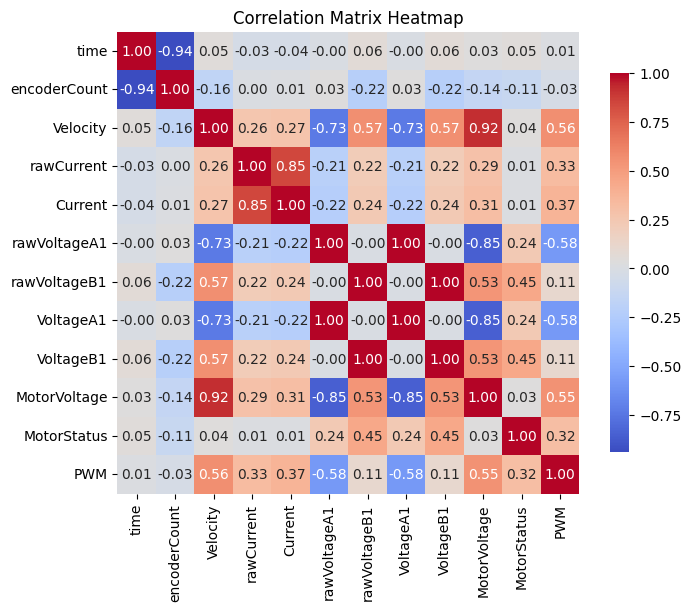

In [ ]:
# Compute the correlation matrix
correlation_matrix = dfa.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .82})
plt.title('Correlation Matrix Heatmap')
plt.show()

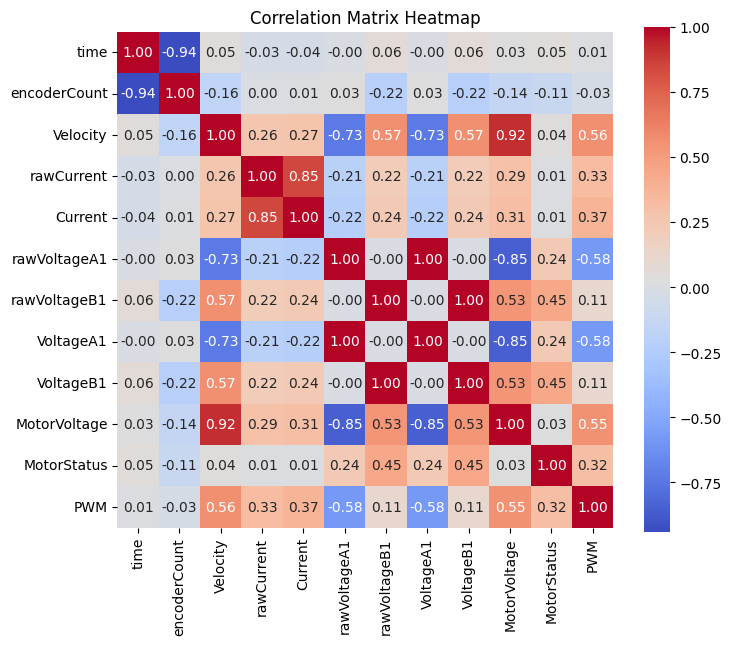

In [ ]:

correlation_matrix = dfa.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .82})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Motor A
Features -> MotorVoltage

output -> Velocity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, explained_variance_score

# Define the features and the target variable
X = dfa[["MotorVoltage"]]
y = dfa["Velocity"]

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('KNeighbors Regressor', KNeighborsRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor())
]

# Function to evaluate a model and record loss values
def evaluate_model(model, X, y):
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Perform cross-validation to capture loss values
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    return -cv_scores  # Convert to positive MSE

# Evaluate each model and print metrics
results = []

for name, model in models:
    # Evaluate and print metrics
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    # Train and evaluate model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    results.append((name, mse, rmse, r2, mae, mape, medae, evs))

    print(f'{name}:')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'MedAE: {medae}')
    print(f'EVS: {evs}')
    print(f"\n")

# Display the results in a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE', 'MAPE', 'MedAE', 'EVS'])
print(results_df)


Linear Regression:
MSE: 6049.7490234375
RMSE: 77.78013610839844
R2: 0.8419087529182434
MAE: 43.16691207885742
MAPE: 1.6867628282806272e+16
MedAE: 29.65723419189453
EVS: 0.8419184684753418


Ridge Regression:
MSE: 6049.74853515625
RMSE: 77.7801284790039
R2: 0.8419087529182434
MAE: 43.167423248291016
MAPE: 1.686854311084032e+16
MedAE: 29.65862274169922
EVS: 0.8419185280799866


ElasticNet:
MSE: 9642.095703125
RMSE: 98.19417572021484
R2: 0.7480340003967285
MAE: 72.41583251953125
MAPE: 5.003395522677965e+16
MedAE: 64.90042114257812
EVS: 0.7480355501174927


KNeighbors Regressor:
MSE: 3813.437255859375
RMSE: 61.75303268432617
R2: 0.9003477692604065
MAE: 28.816524505615234
MAPE: 4822543898771456.0
MedAE: 10.20001220703125
EVS: 0.9003933072090149


Decision Tree Regressor:
MSE: 3341.134581015385
RMSE: 57.80254822250819
R2: 0.9126899079857829
MAE: 26.357572774223907
MAPE: 4543011519912655.0
MedAE: 9.320403658151974
EVS: 0.9126948550250304


Random Forest Regressor:
MSE: 3337.0395672062436
RMSE

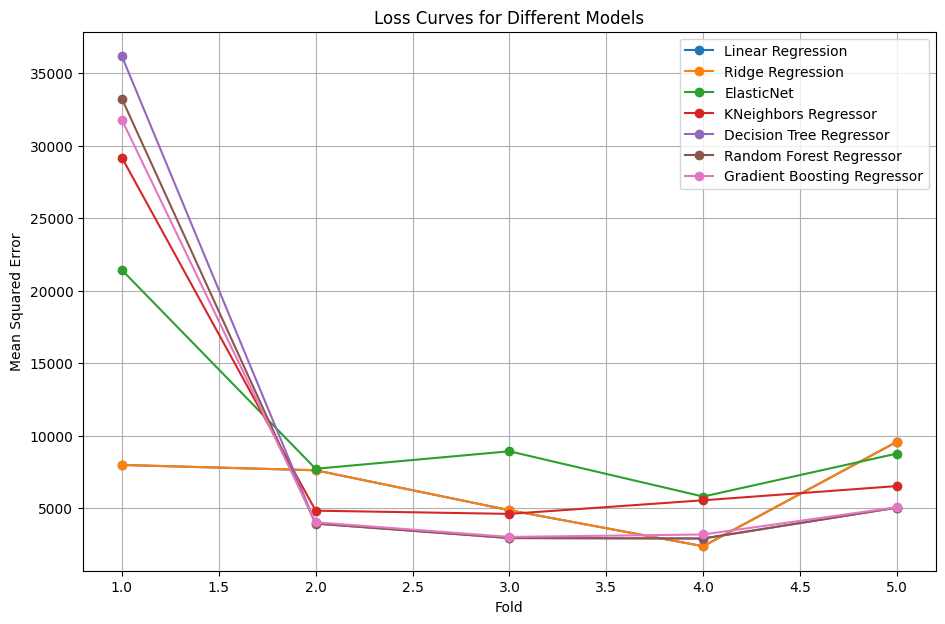

In [ ]:
# Plot loss curves
plt.figure(figsize=(11, 7))

for name, model in models:
    mse_scores = evaluate_model(model, X, y)
    plt.plot(np.arange(1, len(mse_scores) + 1), mse_scores, marker='o', label=name)

plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


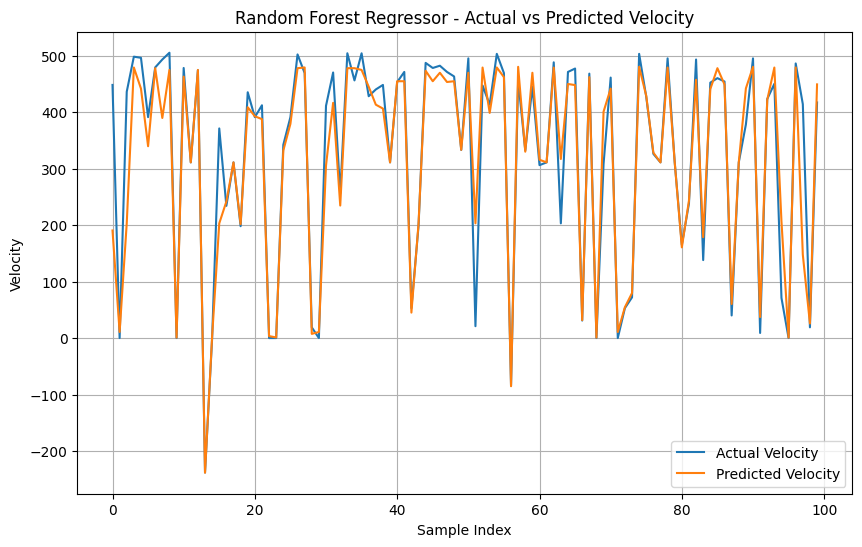

In [ ]:
# Select a model to visualize (e.g., Random Forest Regressor)
model_name, model = 'Random Forest Regressor', RandomForestRegressor()

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipeline.predict(X_train)

# Take the first 100 samples
n_samples = 100
y_train_sample = y_train.iloc[:n_samples]
y_train_pred_sample = y_train_pred[:n_samples]

# Plot actual vs. predicted values for the first 30 samples
plt.figure(figsize=(10, 6))
plt.plot(y_train_sample.values, label='Actual Velocity')
plt.plot(y_train_pred_sample, label='Predicted Velocity')
plt.xlabel('Sample Index')
plt.ylabel('Velocity')
plt.title(f'{model_name} - Actual vs Predicted Velocity')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def get_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    return y_test, predictions

/home/balawima/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


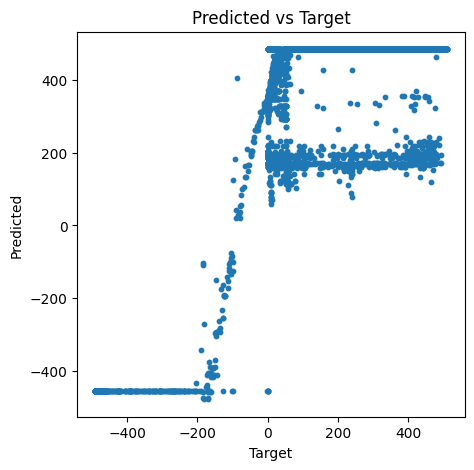

In [ ]:
targets, outputs = get_predictions(model, X_test, y_test)

plt.figure(figsize=(5, 5))
plt.scatter(targets, outputs, s=10)
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.title("Predicted vs Target")
plt.show()

In [ ]:
import joblib

# Choose the model to save results
selected_model_name = 'Random Forest Regressor'  # Replace this with the model you want to save
selected_model = [model for name, model in models if name == selected_model_name][0]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill null values with the mean of each column
    ('scaler', StandardScaler()),                 # Standardize the features
    ('regressor', selected_model)                  # Regression model
])

# Refit the pipeline on the entire training data
pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'MotorA_RandomForest_One_Feature_model.pkl')
print(f"{selected_model_name} model saved to 'selected_model_pipeline.pkl'")


Random Forest Regressor model saved to 'selected_model_pipeline.pkl'


Feature Engineering (Motor A)

Hyperparameter Tuning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, explained_variance_score


# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Setup GridSearchCV with verbose output
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate best model on test set
y_pred = best_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, MEDAE: {medae}, EVS: {evs} ')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3431.116 total time=   3.4s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3584.190 total time=   3.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3400.565 total time=   3.3s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3453.529 total time=   3.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-3239.961 total time=   3.3s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3429.032 total time=   6.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3584.203 total time=   6.6s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200

/home/balawima/miniconda3/envs/torch/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


MSE: 3331.869470324564, R2: 0.9129320226469324, RMSE: 57.722348101273255, MAE: 26.352952357270414, MAPE: 4567533941663113.0, MEDAE: 9.347639919113988, EVS: 0.9129371441073988 


In [ ]:
import joblib
# Save the model to a file
joblib.dump(best_model, 'best_random_forest_model.joblib')

['best_random_forest_model.joblib']

In [ ]:
import joblib

# Load the model from the file
loaded_model = joblib.load('best_random_forest_model.joblib')

# Access the best parameters
best_params = loaded_model.get_params()

print("Best Parameters:", best_params)


Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Ensemble Methods: Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Define base models for stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=200)),
    ('gb', GradientBoostingRegressor(n_estimators=200)),
    ('dt', DecisionTreeRegressor())
]

# Define stacking model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predict with stacking model
y_pred_stack = stacking_model.predict(X_test)

# Calculate and print metrics for stacking model
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mape_stack = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100
medae_stack = np.median(np.abs(y_test - y_pred_stack))
evs_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Model:')
print(f'MSE: {mse_stack}')
print(f'RMSE: {rmse_stack}')
print(f'R2: {r2_stack}')
print(f'MAE: {mae_stack}')
print(f'MAPE: {mape_stack}')
print(f'MEDAE: {medae_stack}')
print(f'EVS: {evs_stack}')


Stacking Model:
MSE: 3434.888916015625
RMSE: 58.60792541503906
R2: 0.9102399349212646
MAE: 28.138566970825195
MAPE: inf
MEDAE: 9.740447998046875
EVS: 0.9102399349212646


/tmp/ipykernel_2898202/3211455089.py:27: RuntimeWarning: divide by zero encountered in divide
  mape_stack = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100


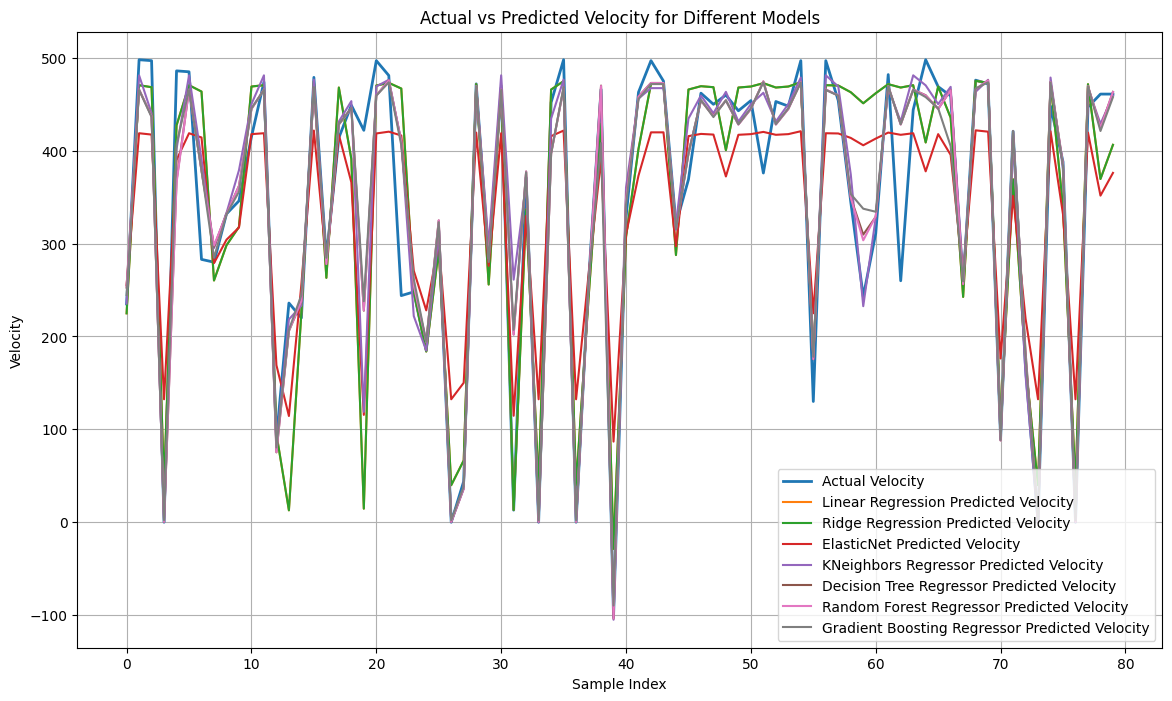

In [8]:
# Plot actual vs. predicted values for each model in one plot
plt.figure(figsize=(14, 8))
n_samples = 80
y_train_sample = y_train.iloc[:n_samples]

plt.plot(y_train_sample.values, label='Actual Velocity', linewidth=2)

for name, y_train_pred in predictions.items():
    plt.plot(y_train_pred[:n_samples], label=f'{name} Predicted Velocity')

plt.xlabel('Sample Index')
plt.ylabel('Velocity')
plt.title('Actual vs Predicted Velocity for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Motor B

We will use best parameters of random fores that found by applying grid search

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score

# Assuming dfa is your DataFrame
X = dfb[["MotorVoltage"]]
y = dfb["Velocity"]

# Create the Random Forest model with the best parameters
best_model = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',
    max_depth=20,
    max_features=1.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=10,
    min_weight_fraction_leaf=0.0,
    n_estimators=300,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

# Fit the model to the data
best_model.fit(X, y)

# Make predictions
predictions = best_model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)
medae = median_absolute_error(y, predictions)
evs = explained_variance_score(y, predictions)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'MEDAE: {medae}')
print(f'EVS: {evs}')


MSE: 3400.3098382891053
RMSE: 58.31217572933723
R2: 0.9137878889729928
MAE: 26.988479689254532
MAPE: 1.0102215178270656e+16
MEDAE: 11.687526432662562
EVS: 0.9137878947037126


/home/balawima/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


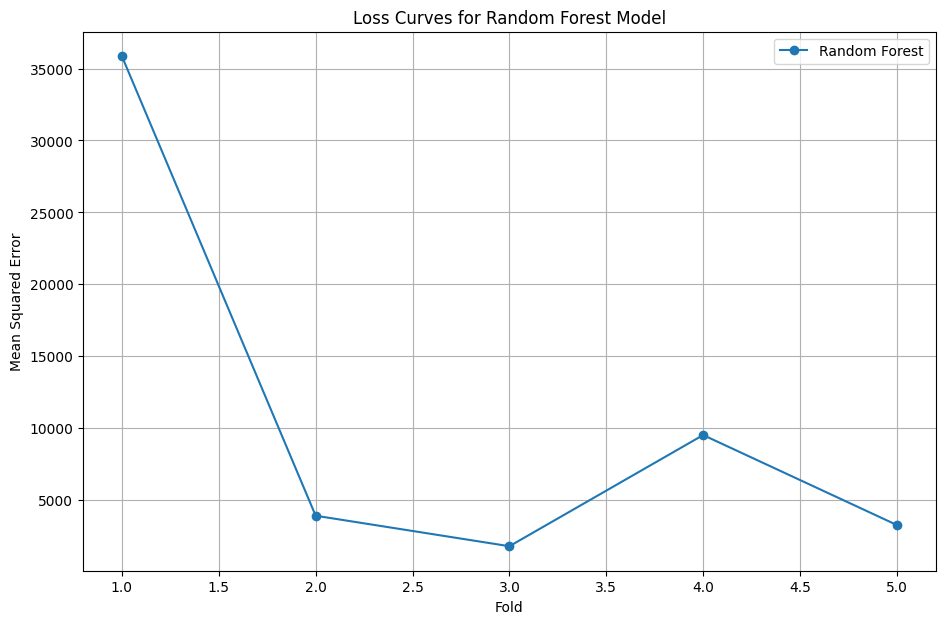

In [ ]:
from sklearn.model_selection import KFold
# Function to evaluate the model using K-Fold cross-validation
def evaluate_model(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_scores.append(mse)

    return mse_scores

# Evaluate the Random Forest model
mse_scores = evaluate_model(best_model, X, y)

# Plot the loss curves
plt.figure(figsize=(11, 7))
plt.plot(np.arange(1, len(mse_scores) + 1), mse_scores, marker='o', label='Random Forest')

plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curves for Random Forest Model')
plt.legend()
plt.grid(True)
plt.show()


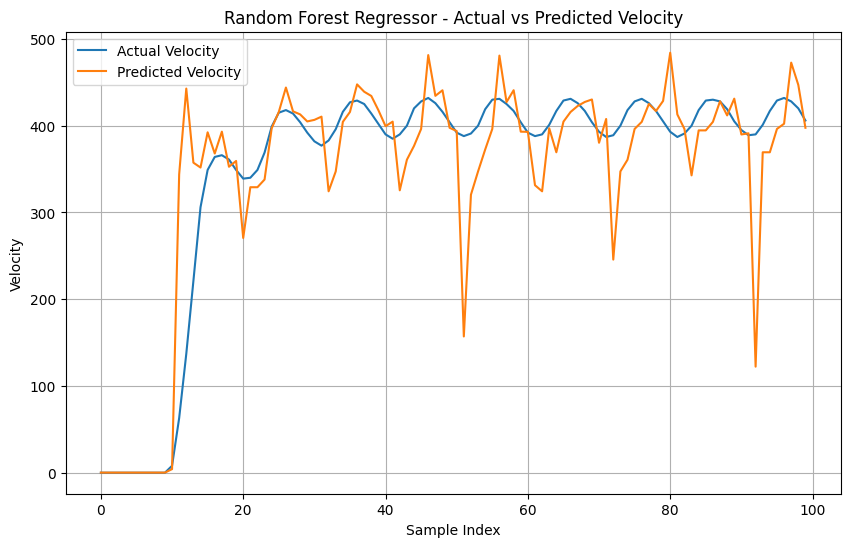

In [ ]:
# Predict on the training set
y_train_pred = best_model.predict(X)

# Take the first 100 samples
n_samples = 100
y_train_sample = y.iloc[:n_samples]
y_train_pred_sample = y_train_pred[:n_samples]

# Plot actual vs. predicted values for the first 100 samples
plt.figure(figsize=(10, 6))
plt.plot(y_train_sample.values, label='Actual Velocity')
plt.plot(y_train_pred_sample, label='Predicted Velocity')
plt.xlabel('Sample Index')
plt.ylabel('Velocity')
plt.title('Random Forest Regressor - Actual vs Predicted Velocity')
plt.legend()
plt.grid(True)
plt.show()


# Deep learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = dfb[["MotorVoltage"]].values
y = dfb["Velocity"].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to match input
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)  # Reshape to match input

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move tensors to the GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)

# Define a more complex neural network model with regularization and dropout
class DeepLearning_B(nn.Module):
    def __init__(self):
        super(DeepLearning_B, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)  
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.1)  # Dropout layer with 10% probability

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.nn.functional.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.nn.functional.leaky_relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.nn.functional.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        return x


# Initialize the model, loss function, and optimizer with weight decay
model_deepLearning = DeepLearning_B().to(device)  # Move model to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model_deepLearning.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop with early stopping
num_epochs = 5000
patience = 50  # Patience for early stopping
best_loss = float('inf')
counter = 0

for epoch in range(num_epochs):
    model_deepLearning.train()

    # Forward pass
    outputs = model_deepLearning(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    model_deepLearning.eval()
    with torch.no_grad():
        val_outputs = model_deepLearning(X_val)
        val_loss = criterion(val_outputs, y_val)

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0

    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model for evaluation
model_deepLearning.load_state_dict(torch.load('best_model.pth'))

# Evaluate on the validation set
model_deepLearning.eval()
with torch.no_grad():
    predictions = model_deepLearning(X_val)
    final_loss = criterion(predictions, y_val)
    print(f'Final Validation Loss: {final_loss.item():.4f}')


Epoch [100/5000], Train Loss: 6697.7554, Val Loss: 5448.7466
Epoch [200/5000], Train Loss: 6364.7720, Val Loss: 5241.8516
Epoch [300/5000], Train Loss: 6194.4971, Val Loss: 5128.8237
Epoch [400/5000], Train Loss: 6016.1279, Val Loss: 5039.8003
Epoch [500/5000], Train Loss: 5905.7451, Val Loss: 4957.3022
Epoch [600/5000], Train Loss: 5761.1401, Val Loss: 4879.0718
Epoch [700/5000], Train Loss: 5649.3574, Val Loss: 4802.2061
Epoch [800/5000], Train Loss: 5552.8242, Val Loss: 4729.0557
Epoch [900/5000], Train Loss: 5439.9551, Val Loss: 4641.9531
Epoch [1000/5000], Train Loss: 5297.2935, Val Loss: 4530.2393
Epoch [1100/5000], Train Loss: 5142.7236, Val Loss: 4387.1006
Epoch [1200/5000], Train Loss: 4872.4463, Val Loss: 4075.1450
Epoch [1300/5000], Train Loss: 4666.7056, Val Loss: 3906.2859
Epoch [1400/5000], Train Loss: 4503.2280, Val Loss: 3809.9309
Epoch [1500/5000], Train Loss: 4362.5981, Val Loss: 3743.3877
Epoch [1600/5000], Train Loss: 4260.5308, Val Loss: 3674.0508
Epoch [1700/5000]

In [ ]:
from sklearn.metrics import r2_score

# Evaluate on the validation set
model_deepLearning.eval()
with torch.no_grad():
    predictions = model_deepLearning(X_val)
    final_loss = criterion(predictions, y_val)
    print(f'Final Validation Loss: {final_loss.item():.4f}')

    # Calculate R² score
    predictions_np = predictions.cpu().numpy()  # Move predictions to CPU and convert to numpy
    y_val_np = y_val.cpu().numpy()  # Move y_val to CPU and convert to numpy
    r2 = r2_score(y_val_np, predictions_np)
    print(f'R² Score: {r2:.4f}')


Final Validation Loss: 3449.7407
R² Score: 0.9118
